### Initial project set up.

In [1]:
# Install necessary dependencies and modules.
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


In [2]:
# Function to fetch data using yfinance
def fetch_yfinance_data(symbol):
    # Fetch the stock data for the given symbol
    stock_data = yf.download(symbol, start='2020-01-01', end='2022-12-31', progress=False)
    stock_data['Company'] = symbol  # Add a column for company name
    return stock_data.reset_index()  # Reset index to have 'Date' as a column


### Data fetching codes by industry: Telecom - Oil.

In [3]:
# Define oil stock symbols
oil_symbols = {
    'Exxon Mobile': 'XOM',
    'Chevron': 'CVX',
    'ConocoPhillips': 'COP'
}

# Fetch data for Exxon Mobile, Chevron, and ConocoPhillips for Oil Stocks Analysis
oil_stock_data = {}
for company, oil_symbol in oil_symbols.items():
    oil_stock_data[company] = fetch_yfinance_data(oil_symbol)


In [4]:
# Define telecom stock symbols
tele_symbols = {
    'AT&T': 'T',
    'T-Mobile': 'TMUS',
    'Verizon': 'VZ'
}

# Fetch data for AT&T, T-Mobile, and Verizon for Telecom Stock Analysis
tele_stock_data = {}
for company, tele_symbol in tele_symbols.items():
    tele_stock_data[company] = fetch_yfinance_data(tele_symbol)

### Data Cleaning and Organization.

In [5]:
# Define a dictionary to map symbols to company names
company_name_mapping = {
    'T': 'AT&T',
    'TMUS': 'T-Mobile',
    'VZ': 'Verizon'
}

# Convert the Tele Date column to datetime format
tele_stock_data = {company: tele_stock_data[company].copy() for company in tele_stock_data}  # Ensure we work with a copy

for company in tele_stock_data:
    tele_stock_data[company]['Date'] = pd.to_datetime(tele_stock_data[company]['Date'])

# Combine the individual company DataFrames into a single DataFrame for cleaning
combined_tele_data = pd.concat(tele_stock_data.values(), ignore_index=True)

# Replace company symbols with full company names
combined_tele_data['Company'] = combined_tele_data['Company'].map(company_name_mapping)

# Sort the data by Company and Date
combined_tele_data.sort_values(by=['Company', 'Date'], inplace=True)

# Handle missing values (if any)
combined_tele_data.ffill(inplace=True)  # Forward fill
combined_tele_data.bfill(inplace=True)  # Backward fill

# Filter the data to include only dates from 2021-01-01 to 2022-01-01
start_date = pd.Timestamp('2020-01-01')
end_date = pd.Timestamp('2022-01-01')
filtered_tele_data = combined_tele_data[(combined_tele_data['Date'] >= start_date) & (combined_tele_data['Date'] <= end_date)].copy()

# Extract year and quarter
filtered_tele_data['Year'] = filtered_tele_data['Date'].dt.year
filtered_tele_data['Quarter'] = filtered_tele_data['Date'].dt.to_period('Q')

# Save the cleaned and filtered Telecom data to a CSV file
filtered_tele_data.to_csv('outputs/filtered_tele_data.csv', index=False)

# Output to check if data is cleaned properly
print(filtered_tele_data.head())


        Date       Open       High        Low      Close  Adj Close    Volume  \
0 2020-01-02  29.577040  29.622356  29.237160  29.350452  20.066732  43165445   
1 2020-01-03  29.138973  29.607250  29.131420  29.501511  20.170012  36296666   
2 2020-01-06  29.448641  29.569487  29.320242  29.531721  20.190666  51229797   
3 2020-01-07  29.516617  29.682779  29.441088  29.645016  20.268124  37337462   
4 2020-01-08  29.705439  29.871601  29.675226  29.735649  20.330088  53645832   

  Company  Year Quarter  
0    AT&T  2020  2020Q1  
1    AT&T  2020  2020Q1  
2    AT&T  2020  2020Q1  
3    AT&T  2020  2020Q1  
4    AT&T  2020  2020Q1  


In [6]:
# Define a dictionary to map symbols to company names
company_name_mapping = {
    'COP': 'ConocoPhillips',
    'XOM': 'ExxonMobil',
    'CVX': 'Chevron'
}

# Convert the Oil Date column to datetime format
oil_stock_data = {company: oil_stock_data[company].copy() for company in oil_stock_data}  # Ensure we work with a copy

for company in oil_stock_data:
    oil_stock_data[company]['Date'] = pd.to_datetime(oil_stock_data[company]['Date'])

# Combine the individual company DataFrames into a single DataFrame for cleaning
combined_oil_data = pd.concat(oil_stock_data.values(), ignore_index=True)

# Replace company symbols with full company names
combined_oil_data['Company'] = combined_oil_data['Company'].map(company_name_mapping)

# Sort the data by Company and Date
combined_oil_data.sort_values(by=['Company', 'Date'], inplace=True)

# Handle missing values (if any)
combined_oil_data.ffill(inplace=True)  # Forward fill
combined_oil_data.bfill(inplace=True)  # Backward fill

# Filter the data to include only dates from 2020-01-01 to 2022-01-01
start_date = pd.Timestamp('2020-01-01')
end_date = pd.Timestamp('2022-01-01')
filtered_oil_data = combined_oil_data[(combined_oil_data['Date'] >= start_date) & (combined_oil_data['Date'] <= end_date)].copy()

# Extract year and quarter
filtered_oil_data['Year'] = filtered_oil_data['Date'].dt.year
filtered_oil_data['Quarter'] = filtered_oil_data['Date'].dt.to_period('Q')

# Save the cleaned and filtered Oil data to a CSV file
filtered_oil_data.to_csv('outputs/filtered_oil_data.csv', index=False)

# Output to check if data is cleaned properly
print(filtered_oil_data.head())



          Date        Open        High         Low       Close  Adj Close  \
756 2020-01-02  120.809998  121.629997  120.769997  121.430000  98.217049   
757 2020-01-03  121.779999  122.720001  120.739998  121.010002  97.877319   
758 2020-01-06  121.239998  121.669998  120.330002  120.599998  97.545708   
759 2020-01-07  119.019997  119.730003  117.769997  119.059998  96.300095   
760 2020-01-08  118.550003  119.089996  117.650002  117.699997  95.200066   

      Volume  Company  Year Quarter  
756  5205000  Chevron  2020  2020Q1  
757  6360900  Chevron  2020  2020Q1  
758  9953000  Chevron  2020  2020Q1  
759  7856900  Chevron  2020  2020Q1  
760  7295900  Chevron  2020  2020Q1  


### Stock Analysis.

### Percentage Change calculation: Measures the growth or decline in stock prices over a period, helping to identify trends and compare performance across different time frames.

/var/folders/rb/2tm7zw5j145975vwqn87sn100000gn/T/ipykernel_85196/3551299865.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  quarterly_oil_percentage_change = filtered_oil_data.groupby(['Company', 'Quarter'], as_index=False).apply(


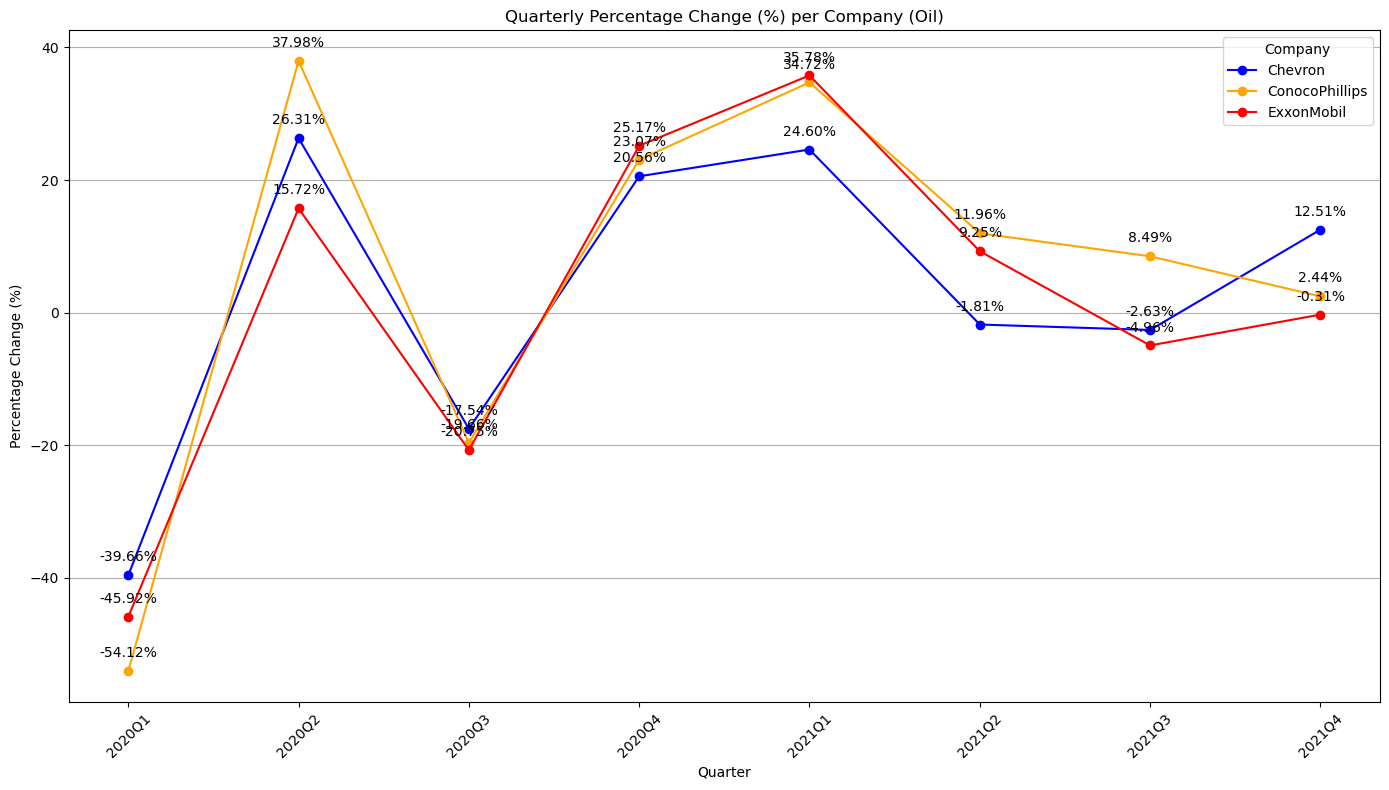

,Company,Quarter,Percentage Change (%)
0,Chevron,2020Q1,-39.660713
1,Chevron,2020Q2,26.312721
2,Chevron,2020Q3,-17.541660
3,Chevron,2020Q4,20.562346
4,Chevron,2021Q1,24.601587
5,Chevron,2021Q2,-1.806150
6,Chevron,2021Q3,-2.626872
7,Chevron,2021Q4,12.508382
8,ConocoPhillips,2020Q1,-54.124655
9,ConocoPhillips,2020Q2,37.981086


In [7]:
# Calculate the Percentage Change (%) in Oil Stock for each quarter
quarterly_oil_percentage_change = filtered_oil_data.groupby(['Company', 'Quarter'], as_index=False).apply(
    lambda x: pd.Series({
        'Percentage Change (%)': (x.loc[x['Date'].idxmax()]['Open'] - x.loc[x['Date'].idxmin()]['Close']) / x.loc[x['Date'].idxmin()]['Close'] * 100
    })
)

# Convert the 'Quarter' column to string for plotting purposes
quarterly_oil_percentage_change['Quarter'] = quarterly_oil_percentage_change['Quarter'].astype(str)

# Define the colors for each company using the stock symbols instead of full company names
oil_colors = {'ExxonMobil': 'Red', 'Chevron': 'Blue', 'ConocoPhillips': 'Orange'}

# Plot the quarterly Percentage Change (%)
plt.figure(figsize=(14, 8))

for company in quarterly_oil_percentage_change['Company'].unique():
    company_data = quarterly_oil_percentage_change[quarterly_oil_percentage_change['Company'] == company]
    
    # Ensure the symbol matches the color dictionary key
    plt.plot(company_data['Quarter'], company_data['Percentage Change (%)'], marker='o', label=company, color=oil_colors[company])
    
    # Annotate each Percentage Change (%) by stock per quarter
    for i, row in company_data.iterrows():
        plt.annotate(f"{row['Percentage Change (%)']:.2f}%", 
                     (row['Quarter'], row['Percentage Change (%)']), 
                     textcoords="offset points", xytext=(0,10), ha='center')

# Plot visual formatting
plt.title('Quarterly Percentage Change (%) per Company (Oil)')
plt.xlabel('Quarter')
plt.ylabel('Percentage Change (%)')
plt.legend(title='Company')
plt.grid(axis='y')  # Add grid lines on the y-axis for clarity
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjusts the plot to ensure everything fits properly
plt.savefig('outputs/oil_stock_change.png')
plt.show()

quarterly_oil_percentage_change


/var/folders/rb/2tm7zw5j145975vwqn87sn100000gn/T/ipykernel_85196/2475460893.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  quarterly_tele_percentage_change = filtered_tele_data.groupby(['Company', 'Quarter'], as_index=False).apply(


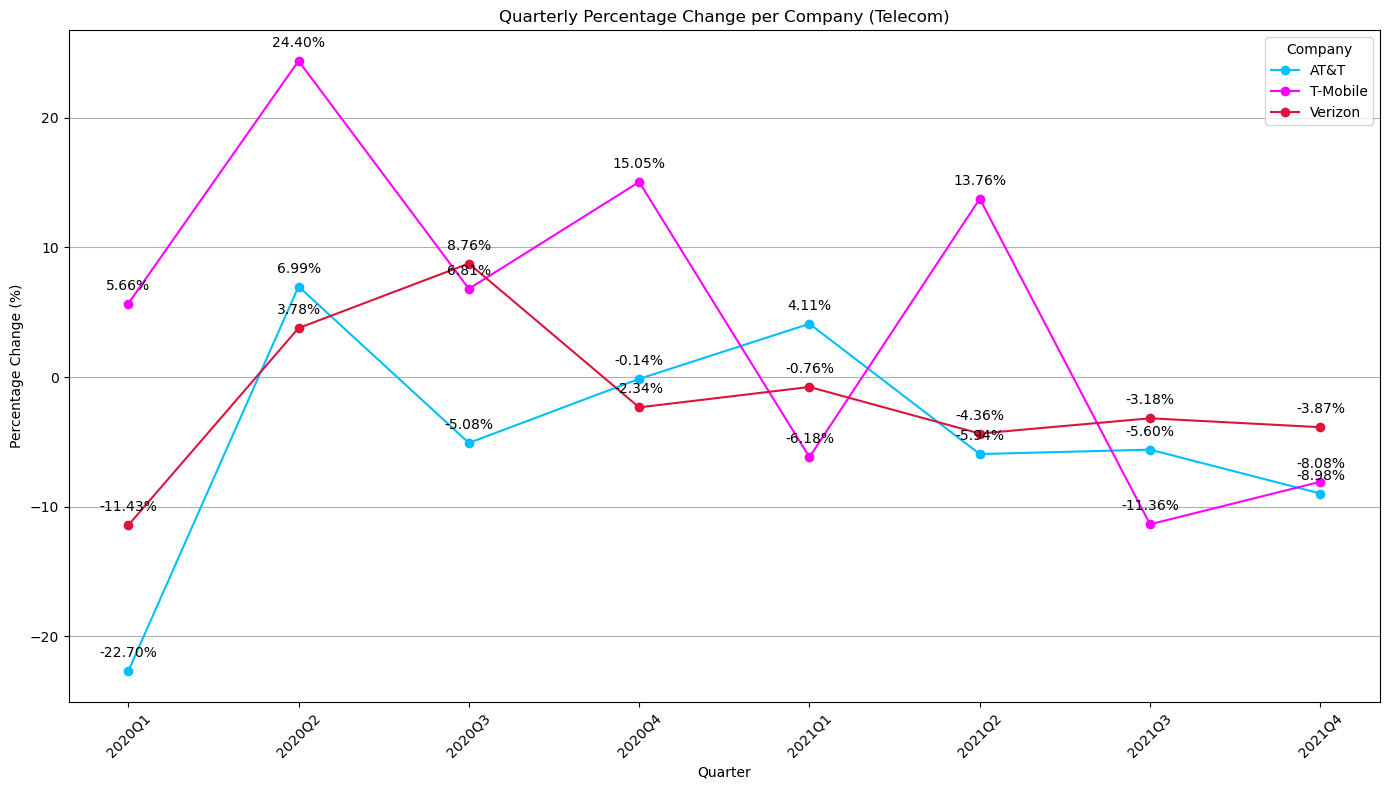

,Company,Quarter,Percentage Change (%)
0,AT&T,2020Q1,-22.696858
1,AT&T,2020Q2,6.987519
2,AT&T,2020Q3,-5.083615
3,AT&T,2020Q4,-0.140404
4,AT&T,2021Q1,4.110060
5,AT&T,2021Q2,-5.940268
6,AT&T,2021Q3,-5.599448
7,AT&T,2021Q4,-8.983804
8,T-Mobile,2020Q1,5.662304
9,T-Mobile,2020Q2,24.397985


In [8]:
# Calculate the percentage change in Telecom Stock for each quarter
quarterly_tele_percentage_change = filtered_tele_data.groupby(['Company', 'Quarter'], as_index=False).apply(
    lambda x: pd.Series({
        'Percentage Change (%)': (x.loc[x['Date'].idxmax()]['Open'] - x.loc[x['Date'].idxmin()]['Close']) / x.loc[x['Date'].idxmin()]['Close'] * 100
    })
)

# Convert the 'Quarter' column to string for proper formatting during plotting
quarterly_tele_percentage_change['Quarter'] = quarterly_tele_percentage_change['Quarter'].astype(str)

# Define the colors using the stock symbols as keys
tele_colors = {'AT&T': 'Deepskyblue', 'T-Mobile': 'Fuchsia', 'Verizon': 'Crimson'}

# Plot the quarterly percentage change
plt.figure(figsize=(14, 8))

for company in quarterly_tele_percentage_change['Company'].unique():
    company_data = quarterly_tele_percentage_change[quarterly_tele_percentage_change['Company'] == company]
    
    # Ensure the symbol matches the color dictionary key
    plt.plot(company_data['Quarter'], company_data['Percentage Change (%)'], marker='o', label=company, color=tele_colors[company])
    
    # Annotate each percentage change by stock per quarter
    for i, row in company_data.iterrows():
        plt.annotate(f"{row['Percentage Change (%)']:.2f}%", 
                     (row['Quarter'], row['Percentage Change (%)']), 
                     textcoords="offset points", xytext=(0,10), ha='center')

# Plot visual formatting
plt.title('Quarterly Percentage Change per Company (Telecom)')
plt.xlabel('Quarter')
plt.ylabel('Percentage Change (%)')
plt.legend(title='Company')
plt.grid(axis='y')  # Add grid lines for better readability
plt.xticks(rotation=45)  # Rotate x-axis labels to avoid overlap
plt.tight_layout()  # Ensure the plot fits well
plt.savefig('outputs/telecom_stock_change.png')  # Save the plot as PNG
plt.show()

quarterly_tele_percentage_change

### Stock Volume Change: Indicates the trading activity and liquidity of a stock, reflecting investor interest and potential price movements.

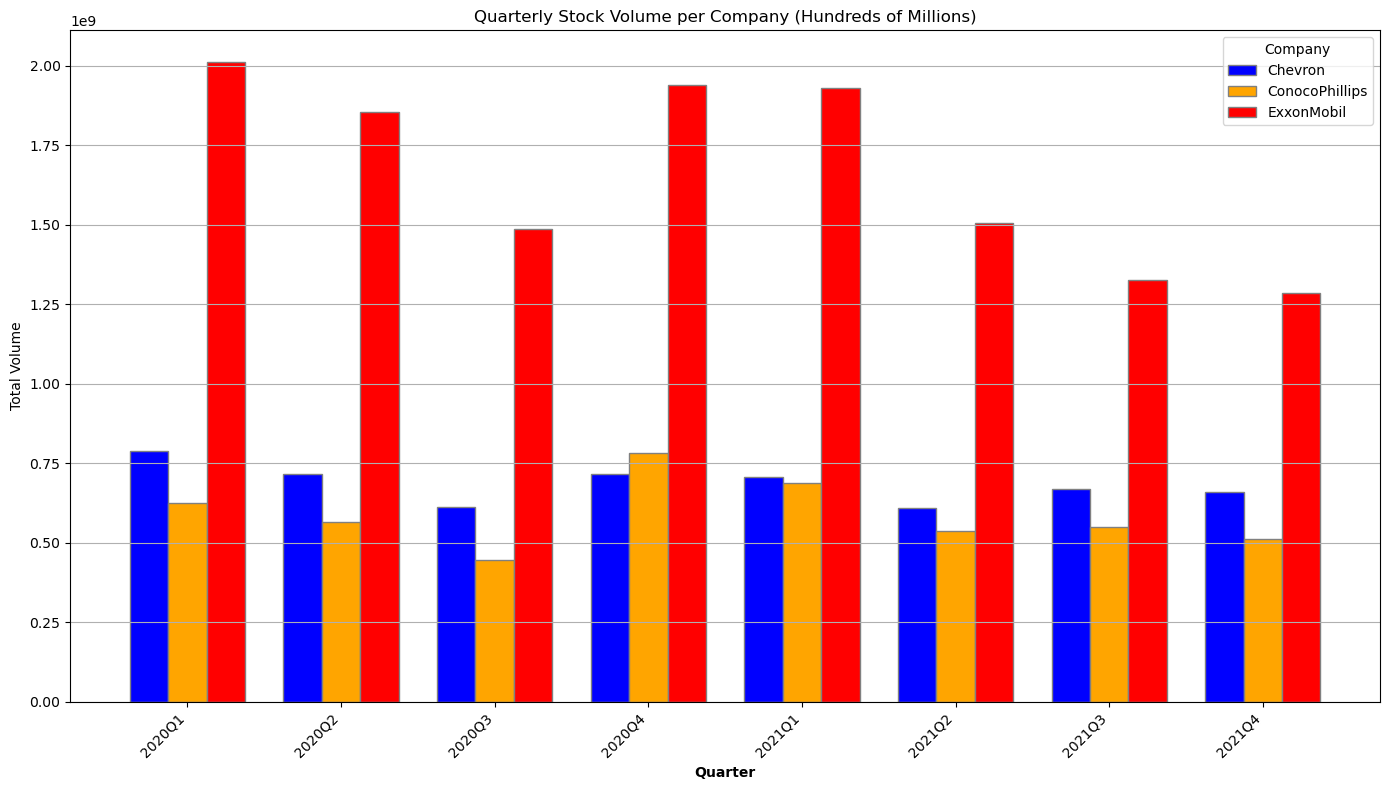

,Company,Quarter,Volume
0,Chevron,2020Q1,788831500
1,Chevron,2020Q2,716030900
2,Chevron,2020Q3,611381100
3,Chevron,2020Q4,717577300
4,Chevron,2021Q1,705058900
5,Chevron,2021Q2,608668800
6,Chevron,2021Q3,669614200
7,Chevron,2021Q4,658214400
8,ConocoPhillips,2020Q1,624612700
9,ConocoPhillips,2020Q2,566239600


In [9]:
# Calculate the quarterly Oil Stock Volume change per quarter.
quarterly_oil_volume = filtered_oil_data.groupby(['Company', 'Quarter'], as_index=False).agg({
    'Volume': 'sum'
})

# Convert the Quarter to a string for plotting due to possible errors.
quarterly_oil_volume['Quarter'] = quarterly_oil_volume['Quarter'].astype(str)

# Get unique quarters and companies
unique_quarters = quarterly_oil_volume['Quarter'].unique()
unique_companies = quarterly_oil_volume['Company'].unique()

# Set the width of the bars
bar_width = 0.25

# Set the position of the bars on the x-axis
r1 = range(len(unique_quarters))  # First set of positions
r2 = [x + bar_width for x in r1]  # Second set of positions
r3 = [x + bar_width for x in r2]  # Third set of positions

# Plot the bars
plt.figure(figsize=(14, 8))

for i, company in enumerate(unique_companies):
    company_data = quarterly_oil_volume[quarterly_oil_volume['Company'] == company]
    positions = [x + i * bar_width for x in r1]  # Adjust position for each company
    plt.bar(positions, company_data['Volume'], width=bar_width, edgecolor='grey', label=company, color=oil_colors[company])

# Plot visual formatting.
# Add xticks on the middle of the group bars
plt.xlabel('Quarter', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(unique_quarters))], unique_quarters)

plt.title('Quarterly Stock Volume per Company (Hundreds of Millions)')
plt.ylabel('Total Volume')
plt.legend(title='Company')
plt.grid(axis='y')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('outputs/oil_stock_volume.png')
plt.show()

quarterly_oil_volume


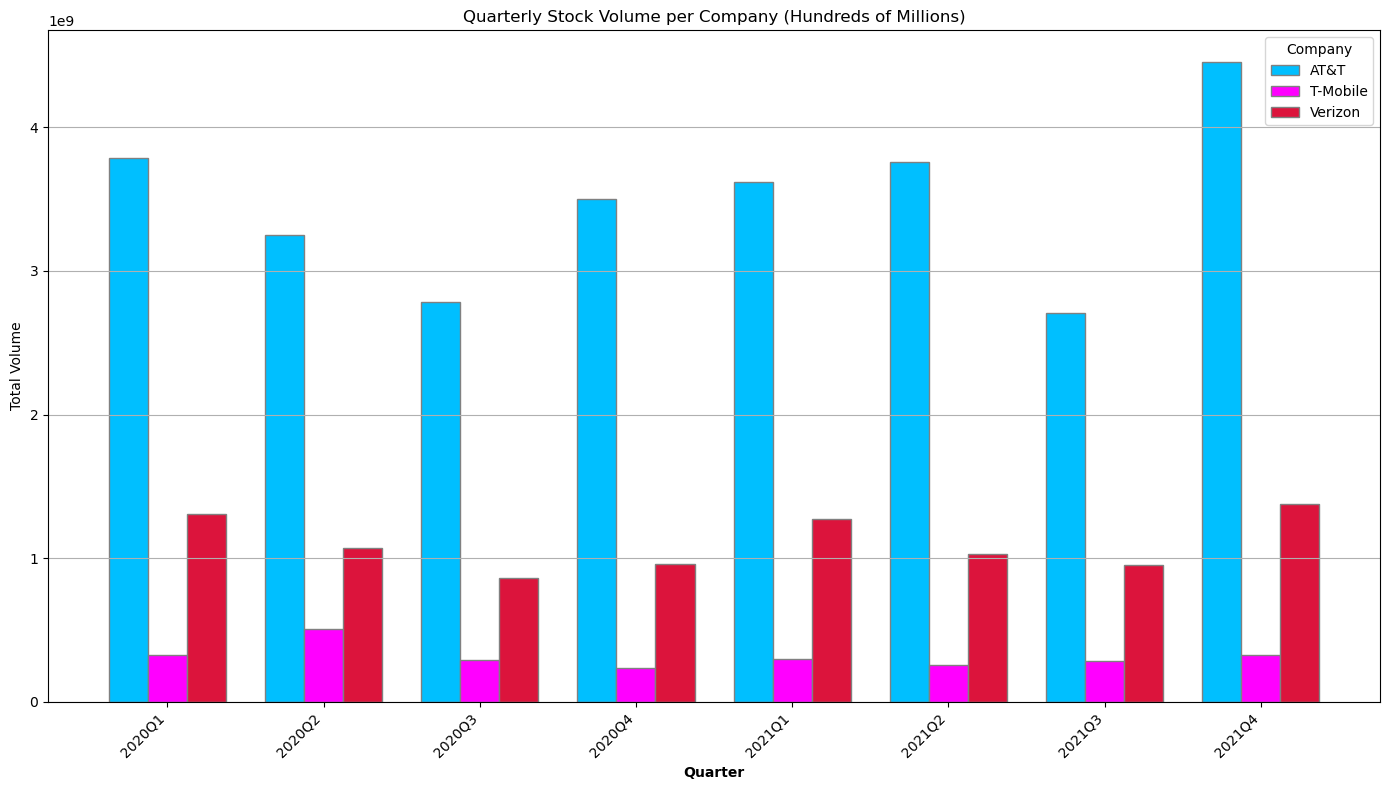

,Company,Quarter,Volume
0,AT&T,2020Q1,3788275272
1,AT&T,2020Q2,3247371887
2,AT&T,2020Q3,2783972152
3,AT&T,2020Q4,3504242716
4,AT&T,2021Q1,3620696860
5,AT&T,2021Q2,3756694829
6,AT&T,2021Q3,2709809752
7,AT&T,2021Q4,4452803979
8,T-Mobile,2020Q1,328931400
9,T-Mobile,2020Q2,508900300


In [10]:
# Calculate the quarterly Telecom Stock Volume change per quarter
quarterly_tele_volume = filtered_tele_data.groupby(['Company', 'Quarter'], as_index=False).agg({
    'Volume': 'sum'
})

# Convert the Quarter to a string for plotting
quarterly_tele_volume['Quarter'] = quarterly_tele_volume['Quarter'].astype(str)

# Get unique quarters and companies
unique_quarters = quarterly_tele_volume['Quarter'].unique()
unique_companies = quarterly_tele_volume['Company'].unique()

# Set the width of the bars
bar_width = 0.25

# Set the position of the bars on the x-axis
r1 = range(len(unique_quarters))  # First set of positions
r2 = [x + bar_width for x in r1]  # Second set of positions
r3 = [x + bar_width for x in r2]  # Third set of positions

# Plot the bars
plt.figure(figsize=(14, 8))

for i, company in enumerate(unique_companies):
    company_data = quarterly_tele_volume[quarterly_tele_volume['Company'] == company]
    positions = [x + i * bar_width for x in r1]  # Adjust position for each company
    plt.bar(positions, company_data['Volume'], width=bar_width, edgecolor='grey', label=company, color=tele_colors[company])

# Plot visual formatting
# Add xticks on the middle of the group bars
plt.xlabel('Quarter', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(unique_quarters))], unique_quarters)

plt.title('Quarterly Stock Volume per Company (Hundreds of Millions)')
plt.ylabel('Total Volume')
plt.legend(title='Company')
plt.grid(axis='y')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('outputs/tele_stock_volume.png')
plt.show()

quarterly_tele_volume


### Standard Deviation (Volatility): Assesses the risk associated with a stock by measuring the variability of its returns, aiding in risk management and investment decisions.

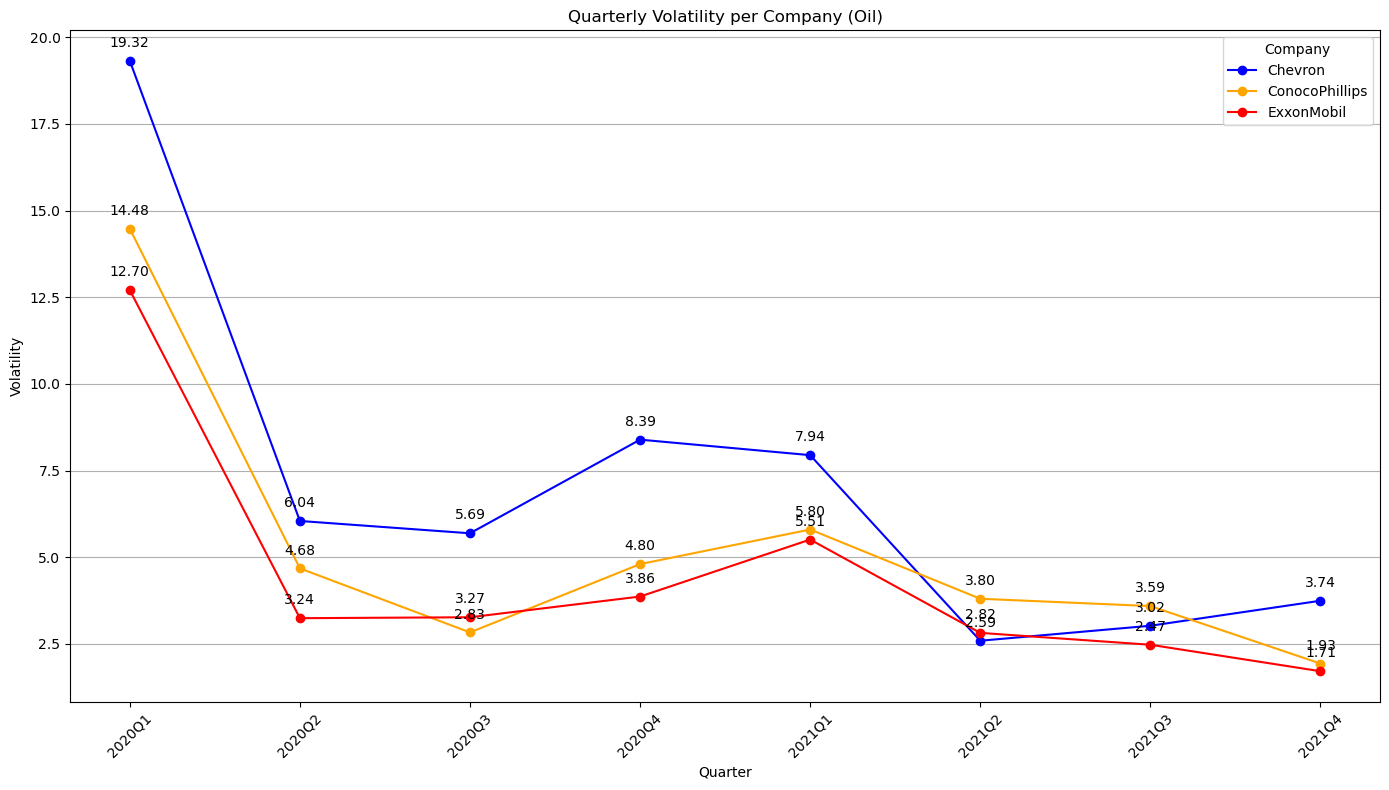

,Company,Quarter,Volatility
0,Chevron,2020Q1,19.319348
1,Chevron,2020Q2,6.044198
2,Chevron,2020Q3,5.688777
3,Chevron,2020Q4,8.390445
4,Chevron,2021Q1,7.943149
5,Chevron,2021Q2,2.588803
6,Chevron,2021Q3,3.021084
7,Chevron,2021Q4,3.742836
8,ConocoPhillips,2020Q1,14.475489
9,ConocoPhillips,2020Q2,4.675746


In [11]:
# Calculate the standard deviation (volatility) in oil Stock for each quarter
quarterly_oil_volatility = filtered_oil_data.groupby(['Company', 'Quarter'], as_index=False)['Close'].std()
quarterly_oil_volatility.rename(columns={'Close': 'Volatility'}, inplace=True)

# Convert the 'Quarter' column to string for plotting
quarterly_oil_volatility['Quarter'] = quarterly_oil_volatility['Quarter'].astype(str)

# Plot the quarterly volatility
plt.figure(figsize=(14, 8))

for company in quarterly_oil_volatility['Company'].unique():
    company_data = quarterly_oil_volatility[quarterly_oil_volatility['Company'] == company]
    plt.plot(company_data['Quarter'], company_data['Volatility'], marker='o', label=company, color=oil_colors[company])
    
    # Annotate each volatility by stock per quarter
    for i, row in company_data.iterrows():
        plt.annotate(f"{row['Volatility']:.2f}", 
                     (row['Quarter'], row['Volatility']), 
                     textcoords="offset points", xytext=(0,10), ha='center')

# Plot visual formatting
plt.title('Quarterly Volatility per Company (Oil)')
plt.xlabel('Quarter')
plt.ylabel('Volatility')
plt.legend(title='Company')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('outputs/oil_volatility.png')
plt.show()

# Output the quarterly oil volatility data
quarterly_oil_volatility


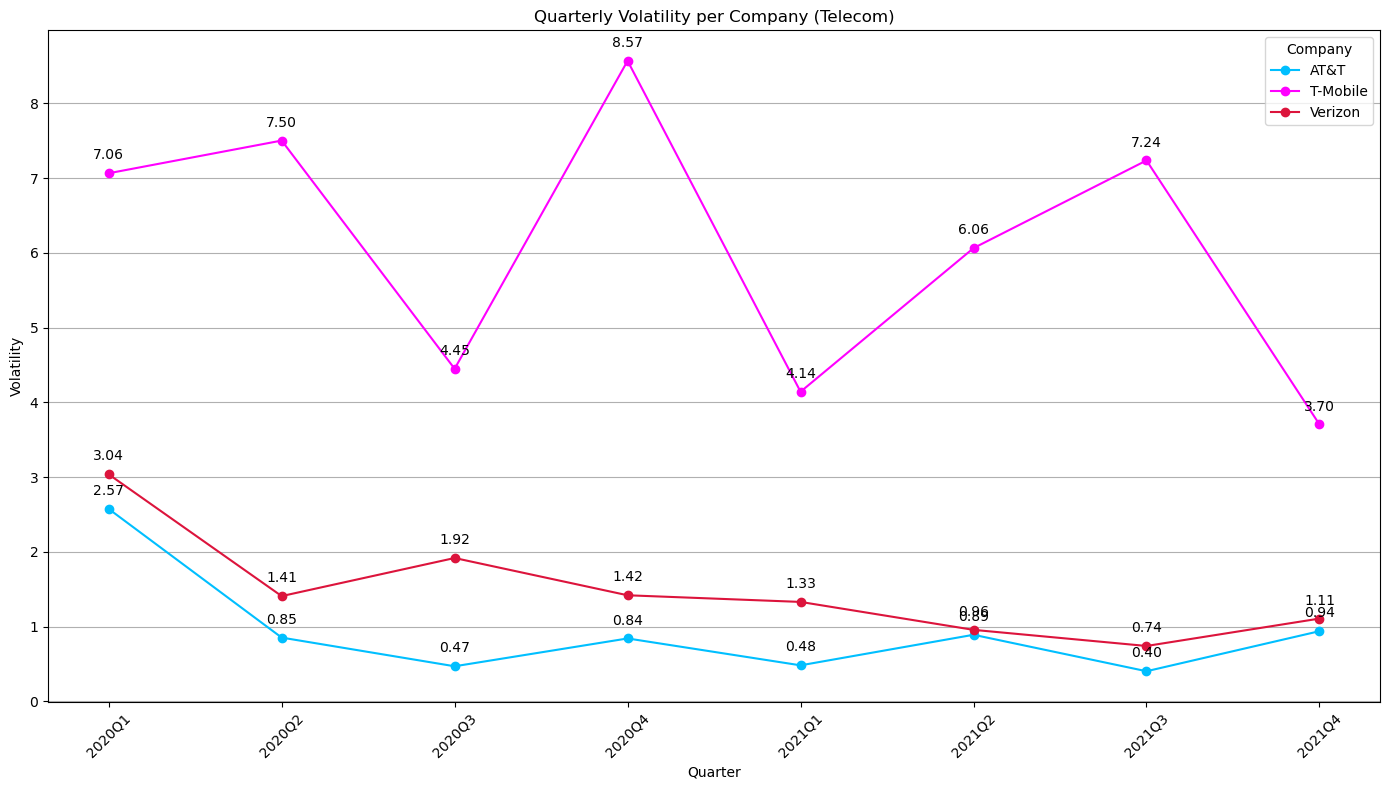

,Company,Quarter,Volatility
0,AT&T,2020Q1,2.574188
1,AT&T,2020Q2,0.852841
2,AT&T,2020Q3,0.469041
3,AT&T,2020Q4,0.841316
4,AT&T,2021Q1,0.481606
5,AT&T,2021Q2,0.890464
6,AT&T,2021Q3,0.402678
7,AT&T,2021Q4,0.938528
8,T-Mobile,2020Q1,7.064551
9,T-Mobile,2020Q2,7.501846


In [12]:
# Calculate the standard deviation (volatility) in telecom Stock for each quarter
quarterly_tele_volatility = filtered_tele_data.groupby(['Company', 'Quarter'], as_index=False)['Close'].std()
quarterly_tele_volatility.rename(columns={'Close': 'Volatility'}, inplace=True)

# Convert the 'Quarter' column to string for plotting
quarterly_tele_volatility['Quarter'] = quarterly_tele_volatility['Quarter'].astype(str)

# Plot the quarterly volatility
plt.figure(figsize=(14, 8))

for company in quarterly_tele_volatility['Company'].unique():
    company_data = quarterly_tele_volatility[quarterly_tele_volatility['Company'] == company]
    plt.plot(company_data['Quarter'], company_data['Volatility'], marker='o', label=company, color=tele_colors[company])
    
    # Annotate each volatility by stock per quarter
    for i, row in company_data.iterrows():
        plt.annotate(f"{row['Volatility']:.2f}", 
                     (row['Quarter'], row['Volatility']), 
                     textcoords="offset points", xytext=(0,10), ha='center')

# Plot visual formatting
plt.title('Quarterly Volatility per Company (Telecom)')
plt.xlabel('Quarter')
plt.ylabel('Volatility')
plt.legend(title='Company')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('outputs/telecom_volatility.png')
plt.show()

# Output the quarterly telecom volatility data
quarterly_tele_volatility


### Return on Investment (ROI): Evaluates the profitability of an investment, enabling investors to gauge the efficiency of their investment choices and compare different investment opportunities.

/var/folders/rb/2tm7zw5j145975vwqn87sn100000gn/T/ipykernel_85196/243011782.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cumulative_oil_roi = filtered_oil_data.groupby(['Company', 'Quarter']).apply(oil_roi).reset_index()


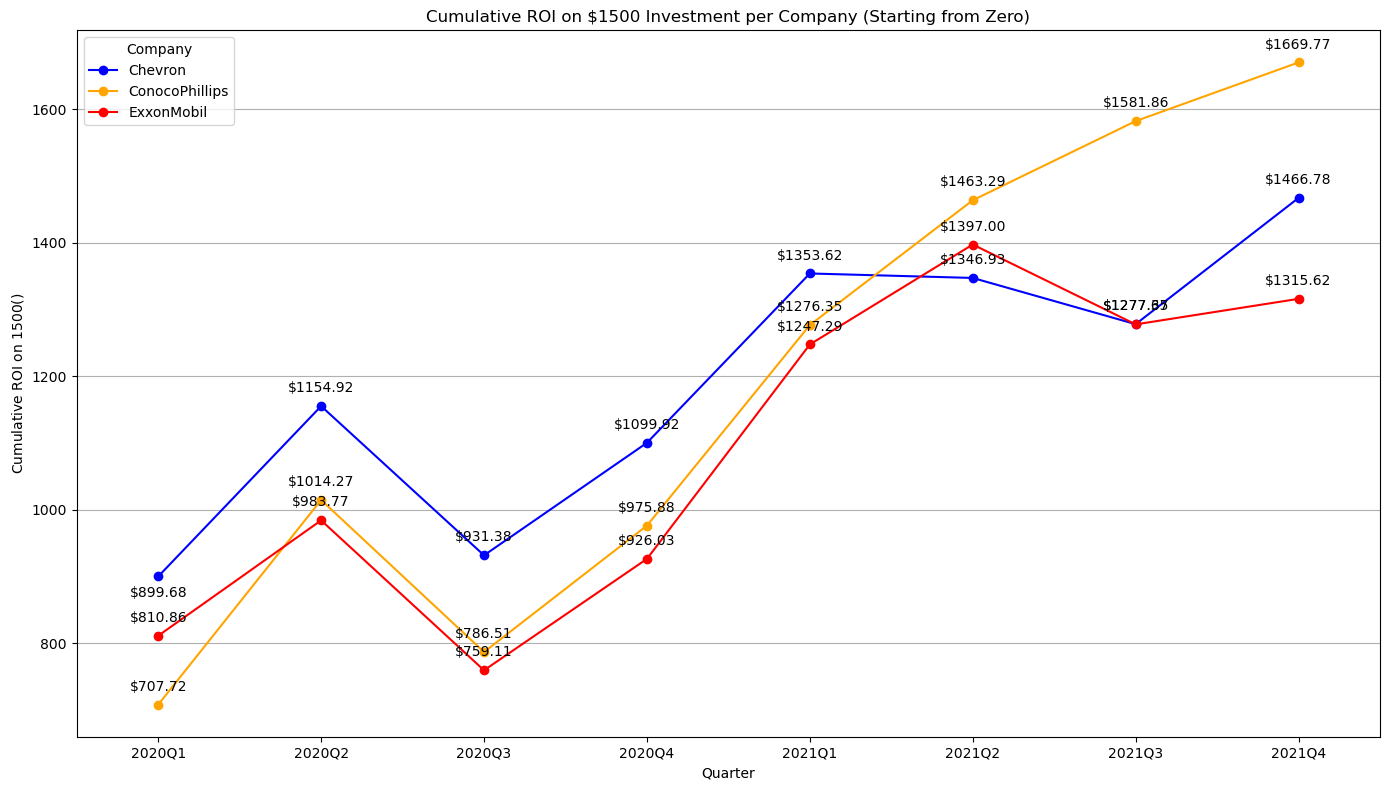

,Company,Quarter,Quarter ROI (%),ROI on $1500 ($),Growth Factor,Cumulative ROI on $1500 ($)
0,Chevron,2020Q1,-40.021521,-600.322814,0.599785,899.68
1,Chevron,2020Q2,28.370020,425.550294,1.283700,1154.92
2,Chevron,2020Q3,-19.354838,-290.322564,0.806452,931.38
3,Chevron,2020Q4,18.095363,271.430452,1.180954,1099.92
4,Chevron,2021Q1,23.065178,345.977669,1.230652,1353.62
5,Chevron,2021Q2,-0.494019,-7.410283,0.995060,1346.93
6,Chevron,2021Q3,-5.142590,-77.138852,0.948574,1277.67
7,Chevron,2021Q4,14.801406,222.021088,1.148014,1466.78
8,ConocoPhillips,2020Q1,-52.818628,-792.279416,0.471814,707.72
9,ConocoPhillips,2020Q2,43.315146,649.727194,1.433151,1014.27


In [15]:
# Get the opening price on 2020-01-02 for each company (change the date if necessary)
initial_prices = filtered_oil_data[filtered_oil_data['Date'] == pd.Timestamp('2020-01-02')].set_index('Company')['Open']

# Calculate the ROI based on quarter opening and closing prices of the Oil Stocks Data
def oil_roi(group):
    opening_price = group.iloc[0]['Open']
    closing_price = group.iloc[-1]['Close']
    roi_percentage = ((closing_price - opening_price) / opening_price) * 100
    growth_factor = 1 + (roi_percentage / 100)
    return pd.Series({
        'Quarter ROI (%)': roi_percentage,
        'ROI on $1500 ($)': (roi_percentage / 100) * 1500,
        'Growth Factor': growth_factor
    })

# Apply the ROI calculation to each company for each quarter
cumulative_oil_roi = filtered_oil_data.groupby(['Company', 'Quarter']).apply(oil_roi).reset_index()

# Initialize cumulative ROI with zero
initial_investment = 1500

# Ensure that the cumulative ROI starts from zero for each company
cumulative_oil_roi['Cumulative ROI on $1500 ($)'] = round(cumulative_oil_roi.groupby('Company')['Growth Factor'].cumprod() * initial_investment, 2)
# cumulative_oil_roi = pd.concat([initial_investment, cumulative_oil_roi], ignore_index=True).sort_values(by=['Company', 'Quarter'])

# Convert the 'Quarter' column to string
cumulative_oil_roi['Quarter'] = cumulative_oil_roi['Quarter'].astype(str)

# Remove the final zero point at the end for each company
cumulative_oil_roi = cumulative_oil_roi[cumulative_oil_roi['Quarter'] != '0']

# Plot the cumulative ROI on a $1500 investment starting from zero
plt.figure(figsize=(14, 8))

for company in cumulative_oil_roi['Company'].unique():
    company_data = cumulative_oil_roi[cumulative_oil_roi['Company'] == company]
    plt.plot(company_data['Quarter'].astype(str), company_data['Cumulative ROI on $1500 ($)'], marker='o', label=company, color=oil_colors[company])

    # Annotate each point with the Y value
    for i, row in company_data.iterrows():
        if company == 'Chevron' and row['Quarter'] == '2020Q1':
            plt.annotate(f"${row['Cumulative ROI on $1500 ($)']:.2f}", (row['Quarter'], row['Cumulative ROI on $1500 ($)']), textcoords="offset points",
                         xytext=(0, -15), ha='center')  # Lower the annotation for Chevron in Q1
        else:
            plt.annotate(f"${row['Cumulative ROI on $1500 ($)']:.2f}", (row['Quarter'], row['Cumulative ROI on $1500 ($)']), textcoords="offset points",
                         xytext=(0, 10), ha='center')

# Plot visual formatting.
# Define the x-tick positions and labels
xticks_positions = range(len(cumulative_oil_roi['Quarter'].unique()))
xticks_labels = cumulative_oil_roi['Quarter'].unique()

plt.xticks(xticks_positions, xticks_labels)

# Set x-axis limits to include space before the first quarter
plt.xlim(left=-0.5, right=len(xticks_positions)-0.5)

plt.title('Cumulative ROI on $1500 Investment per Company (Starting from Zero)')
plt.xlabel('Quarter')
plt.ylabel('Cumulative ROI on $1500 ($)')
plt.legend(title='Company')
plt.grid(True, axis='y')  # Horizontal grid lines only
plt.tight_layout()
plt.savefig('outputs/oil_roi.png')
plt.show()

cumulative_oil_roi

/var/folders/rb/2tm7zw5j145975vwqn87sn100000gn/T/ipykernel_85196/2072461068.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cumulative_tele_roi = filtered_tele_data.groupby(['Company', 'Quarter']).apply(tele_roi).reset_index()


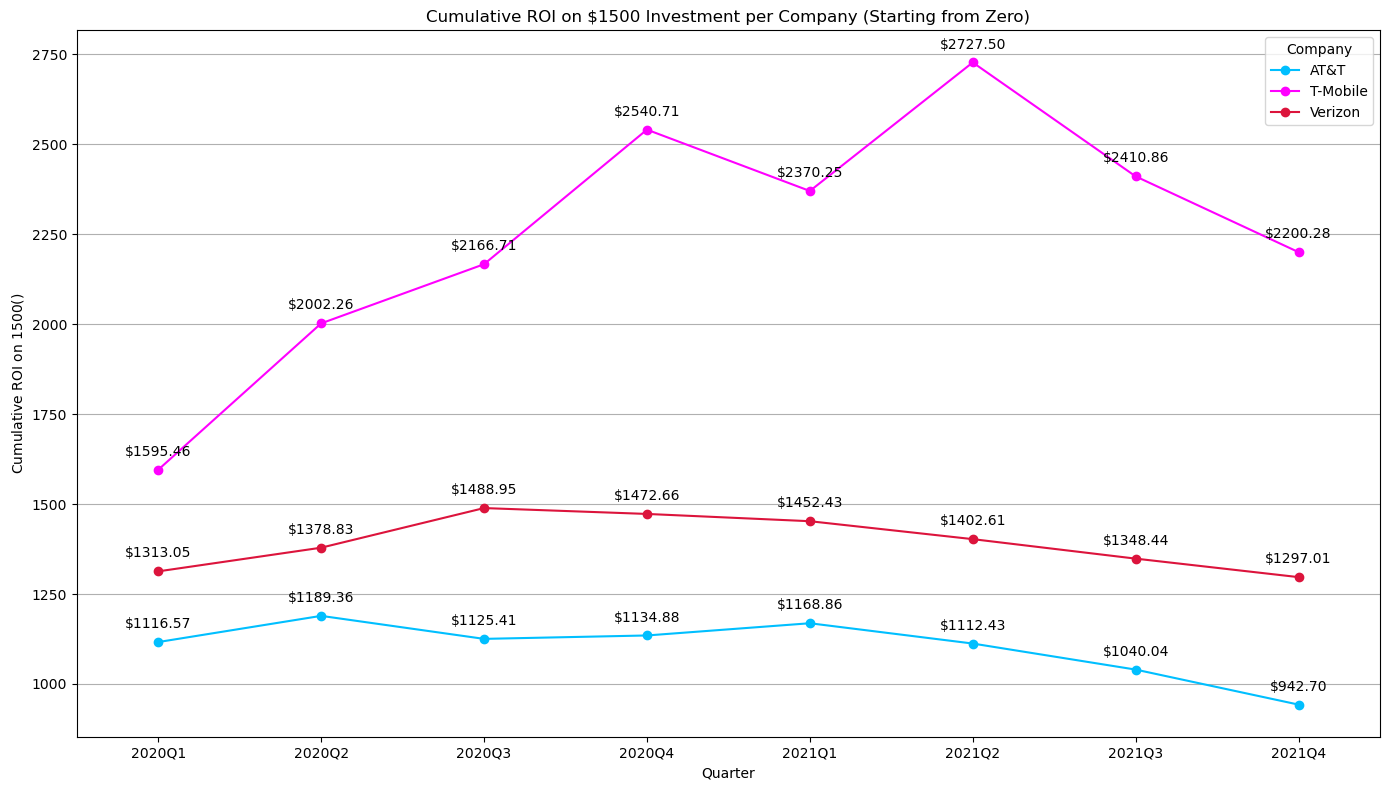

,Company,Quarter,Quarter ROI (%),ROI on $1500 ($),Growth Factor,Cumulative ROI on $1500 ($)
0,AT&T,2020Q1,-25.561797,-383.426957,0.744382,1116.57
1,AT&T,2020Q2,6.518678,97.780175,1.065187,1189.36
2,AT&T,2020Q3,-5.376697,-80.650461,0.946233,1125.41
3,AT&T,2020Q4,0.841514,12.622708,1.008415,1134.88
4,AT&T,2021Q1,2.994213,44.913188,1.029942,1168.86
5,AT&T,2021Q2,-4.828040,-72.420594,0.951720,1112.43
6,AT&T,2021Q3,-6.507439,-97.611592,0.934926,1040.04
7,AT&T,2021Q4,-9.358886,-140.383296,0.906411,942.70
8,T-Mobile,2020Q1,6.364103,95.461545,1.063641,1595.46
9,T-Mobile,2020Q2,25.497053,382.455794,1.254971,2002.26


In [16]:
# Get the opening price on 2020-01-02 for each company (change the date if necessary)
initial_prices_tele = filtered_tele_data[filtered_tele_data['Date'] == pd.Timestamp('2020-01-02')].set_index('Company')['Open']

# Calculate the ROI based on quarter opening and closing prices of the telecom Stocks Data
def tele_roi(group):
    opening_price = group.iloc[0]['Open']
    closing_price = group.iloc[-1]['Close']
    roi_percentage = ((closing_price - opening_price) / opening_price) * 100
    growth_factor = 1 + (roi_percentage / 100)
    return pd.Series({
        'Quarter ROI (%)': roi_percentage,
        'ROI on $1500 ($)': (roi_percentage / 100) * 1500,
        'Growth Factor': growth_factor
    })

# Apply the ROI calculation to each company for each quarter
cumulative_tele_roi = filtered_tele_data.groupby(['Company', 'Quarter']).apply(tele_roi).reset_index()

# Initialize cumulative ROI with zero
initial_investment = 1500
# Ensure that the cumulative ROI starts from zero for each company
cumulative_tele_roi['Cumulative ROI on $1500 ($)'] = round(cumulative_tele_roi.groupby('Company')['Growth Factor'].cumprod() * initial_investment, 2)
# cumulative_tele_roi = pd.concat([initial_investment, cumulative_tele_roi], ignore_index=True).sort_values(by=['Company', 'Quarter'])

# Convert the 'Quarter' column to string
cumulative_tele_roi['Quarter'] = cumulative_tele_roi['Quarter'].astype(str)

# Remove the final zero point at the end for each company
cumulative_tele_roi = cumulative_tele_roi[cumulative_tele_roi['Quarter'] != '0']

# Plot the cumulative ROI on a $1500 investment starting from zero
plt.figure(figsize=(14, 8))

for company in cumulative_tele_roi['Company'].unique():
    company_data = cumulative_tele_roi[cumulative_tele_roi['Company'] == company]
    plt.plot(company_data['Quarter'].astype(str), company_data['Cumulative ROI on $1500 ($)'], marker='o', label=company, color=tele_colors[company])

    # Annotate each point with the Y value
    for i, row in company_data.iterrows():
        plt.annotate(f"${row['Cumulative ROI on $1500 ($)']:.2f}", (row['Quarter'], row['Cumulative ROI on $1500 ($)']), textcoords="offset points",
                     xytext=(0, 10), ha='center')

# Plot visual formatting.
# Define the x-tick positions and labels
xticks_positions = range(len(cumulative_tele_roi['Quarter'].unique()))
xticks_labels = cumulative_tele_roi['Quarter'].unique()

plt.xticks(xticks_positions, xticks_labels)

# Set x-axis limits to include space before the first quarter
plt.xlim(left=-0.5, right=len(xticks_positions)-0.5)

plt.title('Cumulative ROI on $1500 Investment per Company (Starting from Zero)')
plt.xlabel('Quarter')
plt.ylabel('Cumulative ROI on $1500 ($)')
plt.legend(title='Company')
plt.grid(True, axis='y')  # Horizontal grid lines only
plt.tight_layout()
plt.savefig('outputs/tele_roi.png')
plt.show()

cumulative_tele_roi

## Export Results

In [17]:
# Define a function to calculate the necessary quarterly metrics efficiently
def calculate_quarterly_metrics_efficient(df, sector_name, 
                                          cumulative_roi, 
                                          quarterly_volatility, 
                                          quarterly_volume, 
                                          quarterly_percentage_change):
    # Merge all pre-calculated metrics into a single DataFrame
    results = pd.merge(quarterly_percentage_change, quarterly_volume, on=['Company', 'Quarter'], how='left')
    results = pd.merge(results, quarterly_volatility, on=['Company', 'Quarter'], how='left')
    results = pd.merge(results, cumulative_roi, on=['Company', 'Quarter'], how='left')

    return results

# Example usage:
# Assuming you have already calculated cumulative_tele_roi, quarterly_tele_volatility, 
# quarterly_tele_volume, and quarterly_tele_percentage_change for Telecom sector

# Create the final results DataFrame for Telecom sector
results_tele = calculate_quarterly_metrics_efficient(
    filtered_tele_data, 
    'Telecom', 
    cumulative_tele_roi, 
    quarterly_tele_volatility, 
    quarterly_tele_volume, 
    quarterly_tele_percentage_change
)

# Export the Telecom results to CSV
results_tele.to_csv('outputs/results_tele.csv', index=False)

# Apply the same approach for Oil sector
results_oil = calculate_quarterly_metrics_efficient(
    filtered_oil_data, 
    'Oil', 
    cumulative_oil_roi, 
    quarterly_oil_volatility, 
    quarterly_oil_volume, 
    quarterly_oil_percentage_change
)

# Export the Oil results to CSV
results_oil.to_csv('outputs/results_oil.csv', index=False)

# Check the first few rows to confirm everything is correct
print(results_tele.head())
print(results_oil.head())

  Company Quarter  Percentage Change (%)      Volume  Volatility  \
0    AT&T  2020Q1             -22.696858  3788275272    2.574188   
1    AT&T  2020Q2               6.987519  3247371887    0.852841   
2    AT&T  2020Q3              -5.083615  2783972152    0.469041   
3    AT&T  2020Q4              -0.140404  3504242716    0.841316   
4    AT&T  2021Q1               4.110060  3620696860    0.481606   

   Quarter ROI (%)  ROI on $1500 ($)  Growth Factor  \
0       -25.561797       -383.426957       0.744382   
1         6.518678         97.780175       1.065187   
2        -5.376697        -80.650461       0.946233   
3         0.841514         12.622708       1.008415   
4         2.994213         44.913188       1.029942   

   Cumulative ROI on $1500 ($)  
0                      1116.57  
1                      1189.36  
2                      1125.41  
3                      1134.88  
4                      1168.86  
   Company Quarter  Percentage Change (%)     Volume  Volatili

In [18]:
# Combine the filtered oil and telecom data
combined_filtered_data = pd.concat([filtered_oil_data, filtered_tele_data], ignore_index=True)

# Save the combined filtered data to a CSV file
combined_filtered_data.to_csv('outputs/combined_filtered_data.csv', index=False)

# Combine the results oil and telecom data
combined_results = pd.concat([results_oil, results_tele], ignore_index=True)

# Export the combined results to a new CSV file
combined_results.to_csv('outputs/combined_results.csv', index=False)

In [19]:
# Calculate the mean for each sector (Oil and Telecom) based on the filtered data

# Select only numeric columns for aggregation (exclude non-numeric columns like 'Company', 'Date', etc.)
numeric_columns_oil = filtered_oil_data.select_dtypes(include=['number']).columns
numeric_columns_tele = filtered_tele_data.select_dtypes(include=['number']).columns

# Calculate the mean for the Oil sector
mean_oil_filtered = filtered_oil_data.groupby('Quarter')[numeric_columns_oil].mean().reset_index()

# Calculate the mean for the Telecom sector
mean_tele_filtered = filtered_tele_data.groupby('Quarter')[numeric_columns_tele].mean().reset_index()

# Add a 'Sector' column to differentiate between Oil and Telecom in the mean data
mean_oil_filtered['Sector'] = 'Oil'
mean_tele_filtered['Sector'] = 'Telecom'

# Combine the mean data for Oil and Telecom into a single DataFrame
mean_filtered_data = pd.concat([mean_oil_filtered, mean_tele_filtered], ignore_index=True)

# Save the mean filtered data to a CSV file
mean_filtered_data.to_csv('outputs/mean_filtered_data.csv', index=False)

# Output to check if mean data for filtered data is calculated correctly
print(mean_filtered_data.head())



  Quarter       Open       High        Low      Close  Adj Close  \
0  2020Q1  68.557688  69.545645  67.173118  68.301344  55.672946   
1  2020Q2  58.378519  59.538624  57.070688  58.274762  48.163431   
2  2020Q3  54.437552  55.150365  53.625625  54.291250  45.528692   
3  2020Q4  51.749896  52.634062  50.922865  51.771823  44.155923   
4  2021Q1  66.321967  67.341639  65.427158  66.453552  57.503471   

         Volume    Year Sector  
0  1.840715e+07  2020.0    Oil  
1  1.659221e+07  2020.0    Oil  
2  1.324692e+07  2020.0    Oil  
3  1.789998e+07  2020.0    Oil  
4  1.816304e+07  2021.0    Oil  


In [20]:
# Select only numeric columns for calculating the mean
numeric_columns_results_oil = results_oil.select_dtypes(include=['float64', 'int64']).columns
numeric_columns_results_tele = results_tele.select_dtypes(include=['float64', 'int64']).columns

# Calculate the mean for the Oil sector's results
mean_oil_results = results_oil.groupby(['Quarter'])[numeric_columns_results_oil].mean().reset_index()

# Calculate the mean for the Telecom sector's results
mean_tele_results = results_tele.groupby(['Quarter'])[numeric_columns_results_tele].mean().reset_index()

# Add a 'Sector' column to differentiate between Oil and Telecom in the results
mean_oil_results['Sector'] = 'Oil'
mean_tele_results['Sector'] = 'Telecom'

# Combine the mean results data for Oil and Telecom into a single DataFrame
mean_results_data = pd.concat([mean_oil_results, mean_tele_results], ignore_index=True)

# Save the mean results data to a CSV file
mean_results_data.to_csv('outputs/mean_results_data.csv', index=False)

# Output to check if mean data for results is calculated correctly
print(mean_results_data.head())


  Quarter  Percentage Change (%)        Volume  Volatility  Quarter ROI (%)  \
0  2020Q1             -46.569735  1.141243e+09   15.499543       -46.260876   
1  2020Q2              26.671523  1.045309e+09    4.653132        31.003032   
2  2020Q3             -19.317777  8.478029e+08    3.927879       -21.549051   
3  2020Q4              22.933655  1.145599e+09    5.684853        21.387024   
4  2021Q1              31.702665  1.107945e+09    6.416264        29.515902   

   ROI on $1500 ($)  Growth Factor  Cumulative ROI on $1500 ($) Sector  
0       -693.913141       0.537391                   806.086667    Oil  
1        465.045478       1.310030                  1050.986667    Oil  
2       -323.235759       0.784509                   825.666667    Oil  
3        320.805359       1.213870                  1000.610000    Oil  
4        442.738534       1.295159                  1292.420000    Oil  
